## Pair programming Beautiful Soup

Enunciado: Escribe una función llamada scrape_coches_ocasion que acepta una URL como argumento y devuelve un DataFrame de pandas con información sobre coches de ocasión encontrados en la página web especificada. La función realizará las siguientes tareas:

1. Realizará una solicitud HTTP GET a la url: https://www.ocasionplus.com/coches-ocasion?type%3DCAR%26sort%3DFECHAOP_DESC%26page%3D2

2. Comprobará el código de estado de la respuesta. Si el código no es 200 (OK), imprimirá un mensaje de error y retornará None.

3. Extraerá los nombres de los coches, los precios rebajados, los precios originales y la información de los kilómetros recorridos de la página.

4. Organizará los datos extraídos en un DataFrame de pandas con las siguientes columnas:
- "coche": Nombres de los coches.
- "precio_rebajado": Precios rebajados.
- "precio_original": Precios originales.
- "km": Kilómetros recorridos.

5. Retornará el DataFrame resultante.

6. Una vez extraida toda la información deberéis almacenar toda la información en un DataFrame. 

In [1]:
# antes de empezar importamos las librerías que vamos a usar. 
# Importar librerías para web scraping y manipulación de datos
# -----------------------------------------------------------------------
from bs4 import BeautifulSoup
import requests

# Importar librerías para manipulación y análisis de datos
# -----------------------------------------------------------------------
import pandas as pd

# Importar librerías para procesamiento de texto
# -----------------------------------------------------------------------
import re

In [36]:
url_coches = 'https://www.ocasionplus.com/ofertas-especiales'

res_coches = requests.get (url_coches)

if res_coches.status_code == 200:

    print("La respuesta de la petición es:", res_coches.status_code)

else:
    print ('none')

La respuesta de la petición es: 200


b'<!DOCTYPE html><html><head><meta charSet="UTF-8" class="next-head"/><title class="next-head">Coches de segunda mano con ofertas especiales - N\xc2\xba1 calidad-precio | OcasionPlus</title><meta name="description" content="Coches de segunda mano con ofertas especiales \xe2\x9c\x93 Financiaci\xc3\xb3n 100% en el acto \xe2\x9c\x93 15 d\xc3\xadas/1000 km de prueba \xe2\x9c\x93 Coches de ocasi\xc3\xb3n con grandes descuentos " class="next-head"/><meta name="robots" content="all" class="next-head"/><meta name="viewport" content="width=device-width, initial-scale=1.0" class="next-head"/><link rel="shortcut icon" href="/static/favicon/favicon.ico" type="image/x-icon" class="next-head"/><link rel="apple-touch-icon" sizes="180x180" href="/static/favicon/apple-touch-icon.png" class="next-head"/><link rel="icon" type="image/png" sizes="32x32" href="/static/favicon/favicon-32x32.png" class="next-head"/><link rel="icon" type="image/png" sizes="194x194" href="/static/favicon/favicon-194x194.png" cl
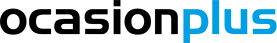

In [37]:
res_coches.content

<!DOCTYPE html>
<html><head><meta charset="utf-8" class="next-head"/><title class="next-head">Coches de segunda mano con ofertas especiales - Nº1 calidad-precio | OcasionPlus</title><meta class="next-head" content="Coches de segunda mano con ofertas especiales ✓ Financiación 100% en el acto ✓ 15 días/1000 km de prueba ✓ Coches de ocasión con grandes descuentos " name="description"/><meta class="next-head" content="all" name="robots"/><meta class="next-head" content="width=device-width, initial-scale=1.0" name="viewport"/><link class="next-head" href="/static/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link class="next-head" href="/static/favicon/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/><link class="next-head" href="/static/favicon/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/><link class="next-head" href="/static/favicon/favicon-194x194.png" rel="icon" sizes="194x194" type="image/png"/><link class="next-head" href="/static/favicon
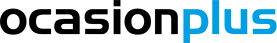

In [38]:
sopa_coches = BeautifulSoup (res_coches.content, 'html.parser')
sopa_coches

In [39]:
#primero sacamos los nombres de los coches
lista_nombre_coches = sopa_coches.find_all ('h2', {'style':'overflow-x:hidden'})
lista_nombre_coches[:4]

[<h2 style="overflow-x:hidden">Dacia Jogger S.L. Extreme TCe (110CV) 7 plazas</h2>,
 <h2 style="overflow-x:hidden">Nissan X-Trail dCi Tekna 4x2 XTronic (130CV)</h2>,
 <h2 style="overflow-x:hidden">Opel Meriva 1.4 Selective (120CV)</h2>,
 <h2 style="overflow-x:hidden">Renault Kangoo Furgon Z.E. (60 CV) AUTO</h2>]

In [40]:
lista_nombre_coches [0].text 

'Dacia Jogger S.L. Extreme TCe (110CV) 7 plazas'

In [41]:
#ahora sacamos el precio sin rebajar, porque no todos tienen precio rebajado
lista_precio_coches = sopa_coches.find_all ('span',{'class':'jsx-2689423372 price'})
lista_precio_coches [:4]

[<span class="jsx-2689423372 price">18.090<!-- -->€</span>,
 <span class="jsx-2689423372 price">16.950<!-- -->€</span>,
 <span class="jsx-2689423372 price">9.000<!-- -->€</span>,
 <span class="jsx-2689423372 price">10.727<!-- -->€</span>]

In [42]:
lista_precio_coches [0].text

'18.090€'

In [43]:
#ahora sacamos el precio rebajado
lista_precio_tachado = sopa_coches.find_all ('span',{'class':'jsx-2870186023 priceLast'})
lista_precio_tachado [:15]

[<span class="jsx-2870186023 priceLast">19.990<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">18.500<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">10.900<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">12.200<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">17.750<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">19.500<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">14.990<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">15.700<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">13.650<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">16.700<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">51.500<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">17.600<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">31.250<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">31.300<!-- -->€</span>,
 <span class="jsx-2870186023 priceLast">18.500<!-- -->€</span>]

In [44]:
lista_precio_tachado [0].text

'19.990€'

In [59]:
#ahora sacamos los km recorridos
lista_km = sopa_coches.find_all ('span',{'class':'jsx-3960002075 detail big'})
lista_km [:4]


[<span class="jsx-3960002075 detail big"><img alt="Fecha Matriculación" class="jsx-3960002075 icon" height="22px" src="https://d2vub9o4tqpvne.cloudfront.net/LsD-JDSSgkhBX7eJ28Z8z_jGoxe8QTmkU6st1MtZpyA/icon/aHR0cHM6Ly9nb3AtZ2FsbGVyeS1kZXYuczMuZXUtd2VzdC0xLmFtYXpvbmF3cy5jb20vb2Nhc2lvbnBsdXMvc3RhdGljL2ljb25zL09QLUlDT05PUy1jYWxlbmRhcmlvLnBuZw" width="25px"/>12/2022</span>,
 <span class="jsx-3960002075 detail big"><img alt="KM" class="jsx-3960002075 icon" height="22px" src="https://d2vub9o4tqpvne.cloudfront.net/7QUTp-181ROLpTllxjLyS9231VvjQgnLQ9zLi6gtR-c/icon/aHR0cHM6Ly9nb3AtZ2FsbGVyeS1kZXYuczMuZXUtd2VzdC0xLmFtYXpvbmF3cy5jb20vb2Nhc2lvbnBsdXMvc3RhdGljL2ljb25zL09QLUlDT05PUy1raWxvbWV0cmFqZS1ncmlzLnBuZw" width="25px"/>54.057<!-- --> km</span>,
 <span class="jsx-3960002075 detail big"><img alt="Combustible" class="jsx-3960002075 icon" height="22px" src="https://d2vub9o4tqpvne.cloudfront.net/ZxWvafD3gA4OZaCrp7xDqYAFAzTGylYu5kFeuVUsvIw/icon/aHR0cHM6Ly9nb3AtZ2FsbGVyeS1kZXYuczMuZXUtd2VzdC0xLmFtYXpvb

In [64]:
lista_km = sopa_coches.find_all ('span',{'class':'jsx-3960002075 detail big'})
lista_km [1]

<span class="jsx-3960002075 detail big"><img alt="KM" class="jsx-3960002075 icon" height="22px" src="https://d2vub9o4tqpvne.cloudfront.net/7QUTp-181ROLpTllxjLyS9231VvjQgnLQ9zLi6gtR-c/icon/aHR0cHM6Ly9nb3AtZ2FsbGVyeS1kZXYuczMuZXUtd2VzdC0xLmFtYXpvbmF3cy5jb20vb2Nhc2lvbnBsdXMvc3RhdGljL2ljb25zL09QLUlDT05PUy1raWxvbWV0cmFqZS1ncmlzLnBuZw" width="25px"/>54.057<!-- --> km</span>

In [89]:
lista_km [1].text.strip()

'54.057 km'

In [48]:

#ahora tenemos una lista con todos los nombres de coches. Aquí sólo se muestran 4

nombres = []

for nombre in lista_nombre_coches:
    nombres.append (nombre.text)

nombres [:4]


['Dacia Jogger S.L. Extreme TCe (110CV) 7 plazas',
 'Nissan X-Trail dCi Tekna 4x2 XTronic (130CV)',
 'Opel Meriva 1.4 Selective (120CV)',
 'Renault Kangoo Furgon Z.E. (60 CV) AUTO']

In [54]:
#ahora tenemos una lista con todos los precios. Estos serían los precios que tienen los coches actualmente.  Aquí sólo se muestran 4

precios_rebajados = []

for precio in lista_precio_coches:
    precios_rebajados.append (precio.text)

precios_rebajados [:4]

['18.090€', '16.950€', '9.000€', '10.727€']

In [55]:
len (precios_rebajados)

20

In [56]:
precios_originales = []

for precio_t in lista_precio_tachado:
        precios_originales.append (precio_t.text)

precios_originales [:4]

['19.990€', '18.500€', '10.900€', '12.200€']

In [57]:
len (precios_originales)

20

In [90]:
lista_km [1].text

'54.057 km'

In [92]:
kms = []

for km in lista_km [1]:
    kms.append (km.text)

kms [:6]

['', '54.057', '', ' km']

In [93]:
kms

['', '54.057', '', ' km']